In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

function ols(x, y; d=1)
    A = x .^ (0:d)'
    betahat = A \ y
    f(x) = evalpoly(x, betahat)
    f
end

function plot_sim(; 
        Nsamples = 1000,
        n = 10,
        dist = Normal(0, 1),
    )
    Y = rand(dist, n, Nsamples)
    Ymean = vec(mean(Y; dims=1))
    Ystd = vec(std(Y; dims=1))
    f = ols(Ymean, Ystd)

    P = plot(dist; label="population dist.", xguide="y")
    Q = scatter(Ymean, Ystd; label="", msc=:auto, ms=2, ma=0.5)
    plot!(f; label="")
    plot!(xguide="sample mean", yguide="sample std")
    plot(P, Q; size=(800, 300), bottommargin=4Plots.mm)
end

plot_sim (generic function with 1 method)

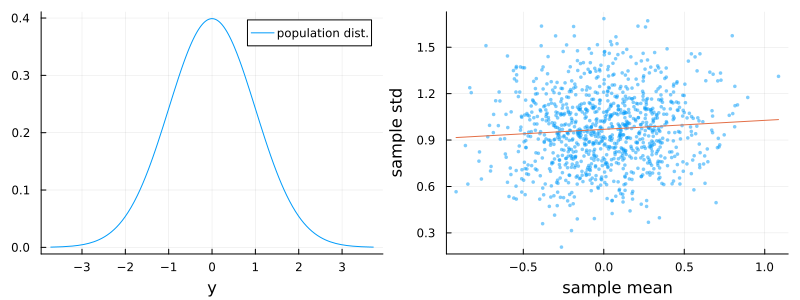

In [2]:
plot_sim(dist=Normal(0, 1))

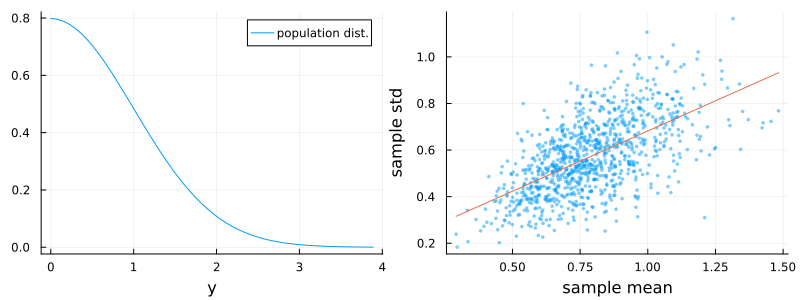

In [3]:
plot_sim(dist=truncated(Normal(0, 1); lower=0))

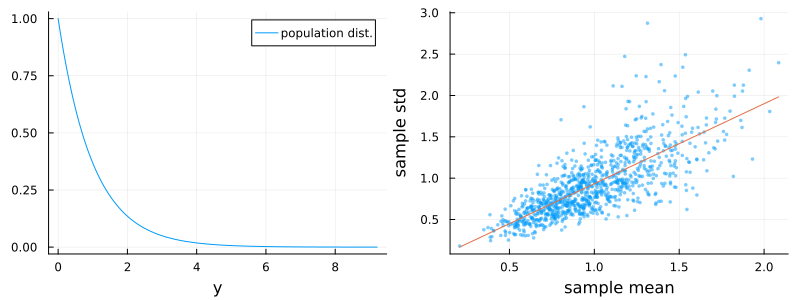

In [4]:
plot_sim(dist=Exponential(1))

In [5]:
using LinearAlgebra

function plot_sim2(;
        Nsamples = 1000,
        n = 10, 
        prior = Normal(0, 2), 
        distfunc = μ -> Normal(μ, 1),
        d = 2,
    )
    Y = [rand(distfunc(rand(prior)), n) for _ in 1:Nsamples]
    Ymean = mean.(Y)
    Ystd = std.(Y)
    f = ols(Ymean, Ystd; d)

    scatter(Ymean, Ystd; label="", msc=:auto, ms=2, ma=0.5)
    plot!(f; label="")
    plot!(xguide="sample mean", yguide="sample std")
end

plot_sim2 (generic function with 1 method)

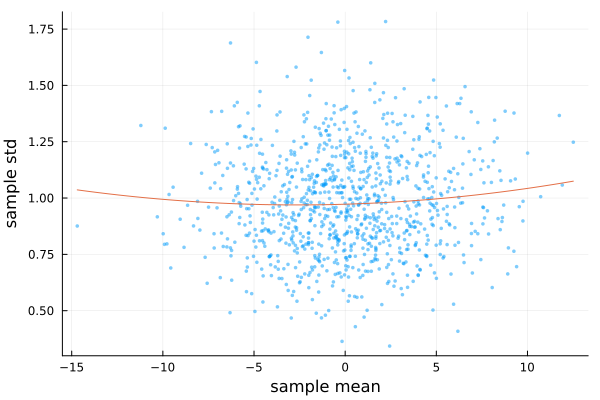

In [6]:
plot_sim2(prior = Normal(0, 4), distfunc = μ -> Normal(μ, 1))

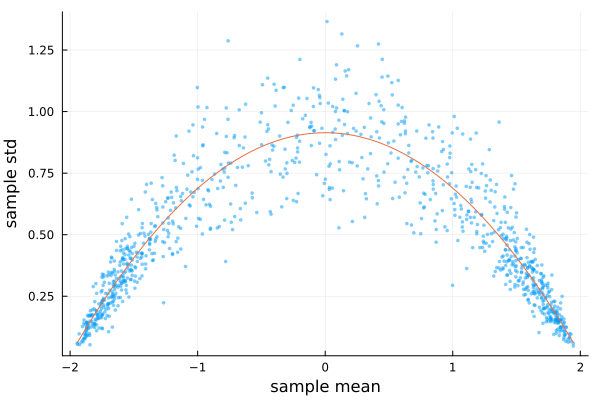

In [7]:
plot_sim2(prior = Normal(0, 4), distfunc = μ -> truncated(Normal(μ, 1), -2, 2))